<span style="font-size:30px">EDA</span>

In [140]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from torchvision.transforms import Resize, ToTensor, Normalize

In [142]:
#torch.cuda.is_available()
torch.cuda.get_device_name(0)

'Tesla V100-PCIE-32GB'

In [143]:
train = pd.read_csv('input/data/train/train_retouch.csv')
train_origin = train.copy()

In [144]:
train.head() # 다섯줄 미리보기

,id,gender,race,age,path
0,1,female,Asian,45,000001_female_Asian_45
1,2,female,Asian,52,000002_female_Asian_52
2,4,male,Asian,54,000004_male_Asian_54
3,5,female,Asian,58,000005_female_Asian_58
4,6,female,Asian,59,000006_female_Asian_59


In [145]:
train.tail() # 마지막 다섯줄 미리보기

,id,gender,race,age,path
2695,6954,male,Asian,19,006954_male_Asian_19
2696,6955,male,Asian,19,006955_male_Asian_19
2697,6956,male,Asian,19,006956_male_Asian_19
2698,6957,male,Asian,20,006957_male_Asian_20
2699,6959,male,Asian,19,006959_male_Asian_19


In [146]:
train.shape # 데이터 shape

(2700, 5)

In [147]:
train.info() # 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [148]:
train.describe() # 데이터 통계량

,age
count,2700.000000
mean,37.708148
std,16.985904
min,18.000000
25%,20.000000
50%,36.000000
75%,55.000000
max,60.000000


In [149]:
train.isnull().sum().to_frame('nan_count') # 데이터 결측치 개수  ( to_frame()과 pd.DataFrame() 두 가지 사용 가능 )
#pd.DataFrame(data=train.isnull().sum())

,nan_count
id,0
gender,0
race,0
age,0
path,0


In [150]:
train.dtypes

id        object
gender    object
race      object
age        int64
path      object
dtype: object

In [151]:
dic_gender = {'male': 0, 'female': 1}

def one_hot_encoding(data, dic):
    output = []
    for d in data:
        output.append(dic[d])
    return output

In [152]:
train.gender = one_hot_encoding(train.gender, dic_gender)

In [153]:
train.gender

0       1
1       1
2       0
3       1
4       1
       ..
2695    0
2696    0
2697    0
2698    0
2699    0
Name: gender, Length: 2700, dtype: int64

In [154]:
del train['race']

In [155]:
del train['path']

In [156]:
train

,id,gender,age
0,1,1,45
1,2,1,52
2,4,0,54
3,5,1,58
4,6,1,59
...,...,...,...
2695,6954,0,19
2696,6955,0,19
2697,6956,0,19
2698,6957,0,20


In [157]:
train.groupby('gender').count()

,id,age
gender,,
0,1042,1042
1,1658,1658


In [158]:
train.groupby('age').count()

,id,gender
age,,
18,192,192
19,407,407
20,267,267
21,41,41
22,58,58
23,72,72
24,62,62
25,82,82
26,44,44


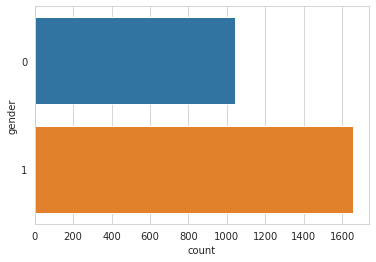

In [159]:
sns.set_style('whitegrid')
sns.countplot(y='gender', data=train)

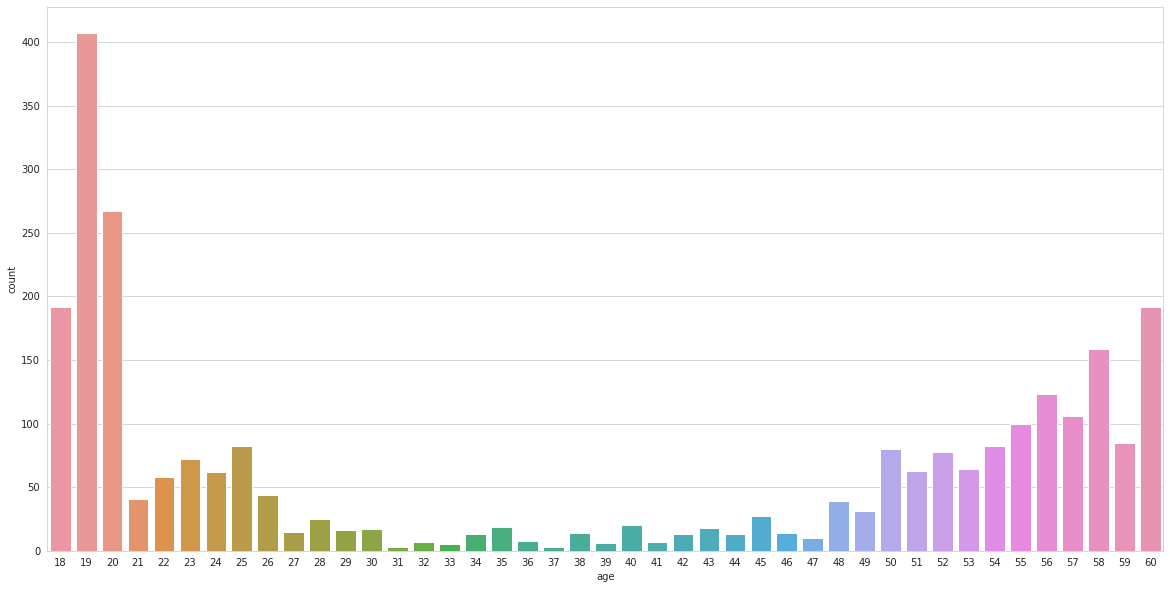

In [160]:
plt.subplots(figsize=(20,10))
sns.countplot(x='age',data=train) # 데이터가 10~20대, 50~60대에 밀집되어있음

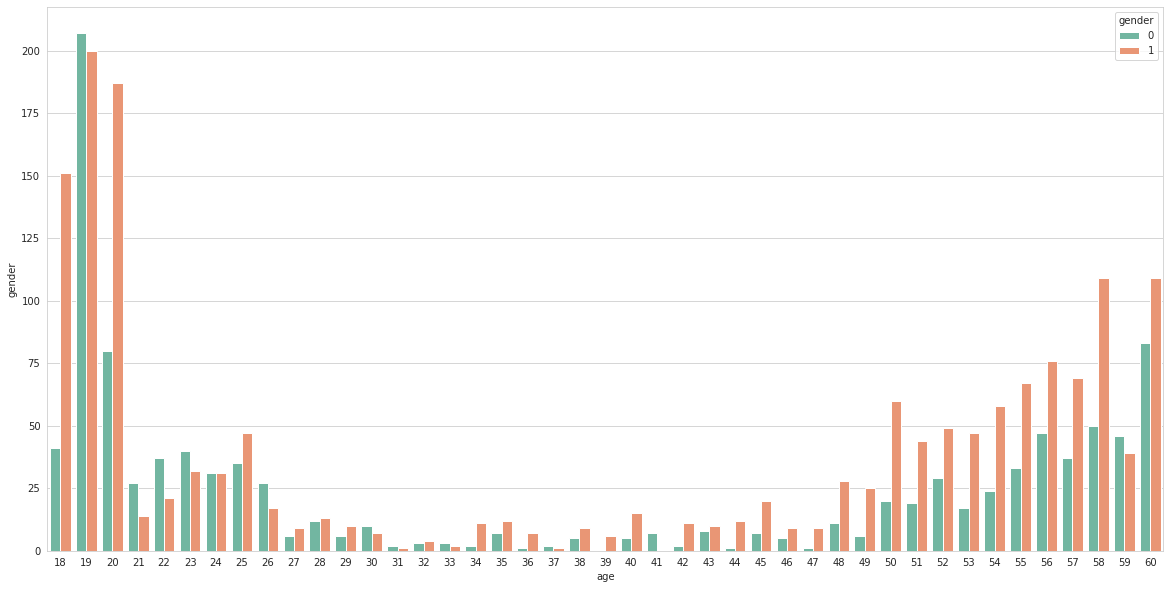

In [161]:
plt.figure(figsize=(20,10))
cnt=sns.countplot(x='age', hue='gender', data=train, palette='Set2')
cnt.set_xlabel("age")
cnt.set_ylabel("gender")
plt.show()

In [162]:
train.query("age<30").groupby('gender').count() # 1281

,id,age
gender,,
0,549,549
1,732,732


In [163]:
train.query("age>=30 and age<60").groupby('gender').count() # 1227

,id,age
gender,,
0,410,410
1,817,817


In [164]:
train.query("age>=60").groupby('gender').count() # 192

,id,age
gender,,
0,83,83
1,109,109


In [165]:
train.age[train.age < 30] = 0

<ipython-input-165-488648ab30d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.age[train.age < 30] = 0


In [166]:
train.age[train.age >= 60] = 2

<ipython-input-166-2900809f4a34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.age[train.age >= 60] = 2


In [167]:
train.age[train.age >= 30] = 1

<ipython-input-167-b28ddcea1173>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.age[train.age >= 30] = 1


In [168]:
train.age.value_counts()

0    1281
1    1227
2     192
Name: age, dtype: int64

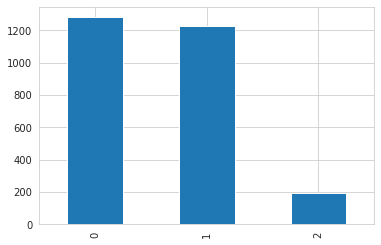

In [169]:
train.age.value_counts().plot.bar()

In [182]:
image_dir = 'input/data/train'

In [183]:
len(os.listdir(image_dir + '/images'))

5400

In [184]:
file_name = []
ids = []
for name_underscore in os.listdir(image_dir + '/images'):
    #print(name_underscore)
    if not name_underscore[:2] == '._':
        file_name.append(name_underscore) # 004222_female_Asian_55 ...
        ids.append(name_underscore.split('_')[0]) # 004222 ...

In [185]:
data = []
for person in file_name:
    images = [image_dir + '/images/' + person + '/' + image for image in os.listdir(train_dir + '/images/' + person) if not image[:1] == '.']
    for image in images:
        data.append(image) # 'input/data/train/images/004222_female_Asian_55/normal.jpg', ...


In [186]:
len(images)

7

In [187]:
len(data)

18900

In [188]:
len(data) / 2700

7.0

In [189]:
len(ids)

2700

In [190]:
masks = []
ids = []
genders = []
ages = []

for d in data:
    mask = d.split('/')[-1][:1] 
    masks.append(mask) # n(미착용), m(착용), i(이상)
    
    features = d.split('/')[-2].split('_')
    ids.append(features[0]) # 004222
    genders.append(features[1]) # female
    ages.append(int(features[3]) // 30) # 55//30

In [191]:
df = pd.DataFrame({'id': ids, 'gender': genders, 'age': ages, 'Mask': masks, 'Class': None, 'img': data})

In [192]:
df

,id,gender,age,Mask,Class,img
0,004222,female,1,n,None,input/data/train/images/004222_female_Asian_55...
1,004222,female,1,i,None,input/data/train/images/004222_female_Asian_55...
2,004222,female,1,m,None,input/data/train/images/004222_female_Asian_55...
3,004222,female,1,m,None,input/data/train/images/004222_female_Asian_55...
4,004222,female,1,m,None,input/data/train/images/004222_female_Asian_55...
...,...,...,...,...,...,...
18895,004347,male,2,m,None,input/data/train/images/004347_male_Asian_60/m...
18896,004347,male,2,m,None,input/data/train/images/004347_male_Asian_60/m...
18897,004347,male,2,m,None,input/data/train/images/004347_male_Asian_60/m...
18898,004347,male,2,m,None,input/data/train/images/004347_male_Asian_60/m...


In [193]:
combination = [(m, g, a) for m in ['m', 'i', 'n'] for g in ['male', 'female'] for a in [0, 1, 2]]

In [194]:
for i, (m, g, a) in enumerate(combination):
    df.Class[(df.Mask == m) & (df.gender == g) & (df.age == a)] = i

<ipython-input-194-a8b53c489ea3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class[(df.Mask == m) & (df.gender == g) & (df.age == a)] = i
<ipython-input-194-a8b53c489ea3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class[(df.Mask == m) & (df.gender == g) & (df.age == a)] = i
<ipython-input-194-a8b53c489ea3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class[(df.Mask == m) & (df.gender == g) & (df.age == a)] = i
<

In [195]:
df # 각 이미지(2700*7=18900)을 class(0~17)를 칼럼으로 하는 dataframe에 정리

,id,gender,age,Mask,Class,img
0,004222,female,1,n,16,input/data/train/images/004222_female_Asian_55...
1,004222,female,1,i,10,input/data/train/images/004222_female_Asian_55...
2,004222,female,1,m,4,input/data/train/images/004222_female_Asian_55...
3,004222,female,1,m,4,input/data/train/images/004222_female_Asian_55...
4,004222,female,1,m,4,input/data/train/images/004222_female_Asian_55...
...,...,...,...,...,...,...
18895,004347,male,2,m,2,input/data/train/images/004347_male_Asian_60/m...
18896,004347,male,2,m,2,input/data/train/images/004347_male_Asian_60/m...
18897,004347,male,2,m,2,input/data/train/images/004347_male_Asian_60/m...
18898,004347,male,2,m,2,input/data/train/images/004347_male_Asian_60/m...


In [196]:
df.Class.value_counts()

4     4085
3     3660
0     2745
1     2050
10     817
16     817
15     732
9      732
12     549
6      549
5      545
2      415
13     410
7      410
17     109
11     109
14      83
8       83
Name: Class, dtype: int64

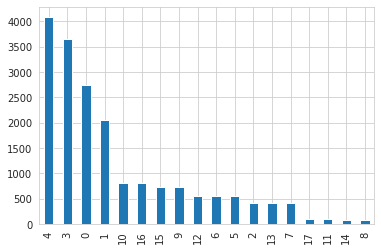

In [197]:
df.Class.value_counts().plot.bar()

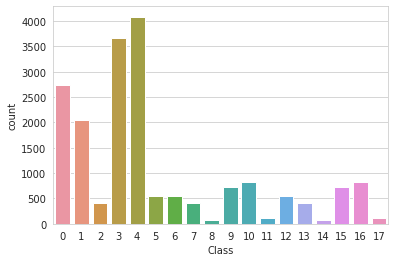

In [198]:
sns.countplot(x='Class',data=df)

In [199]:
df.gender = one_hot_encoding(df.gender, dic_gender)

In [200]:
df.gender.map(dic_gender).value_counts()

Series([], Name: gender, dtype: int64)

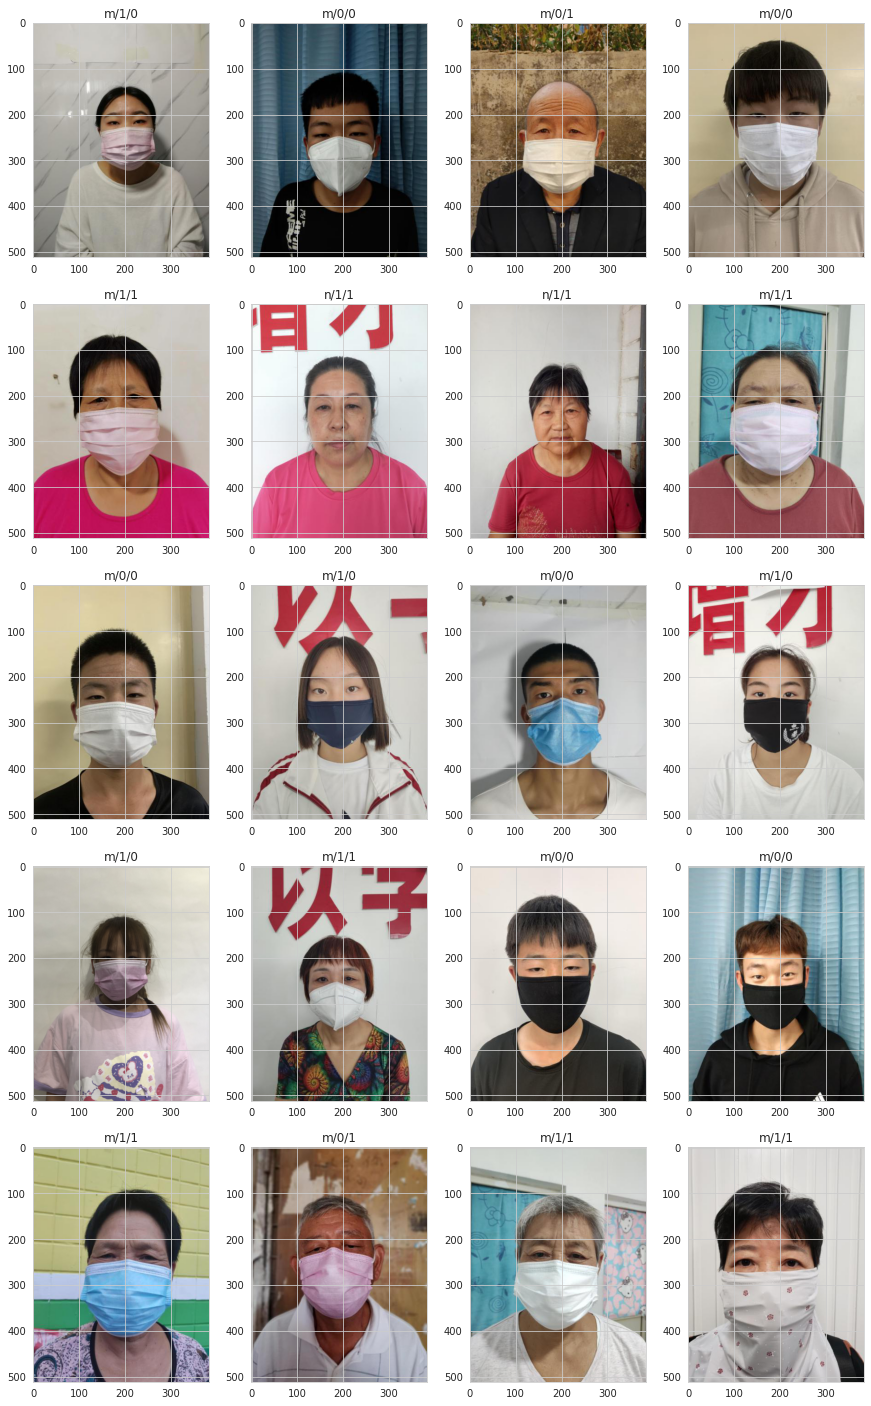

In [201]:
fig = plt.figure(figsize=(15,25))
idx = 0

for i in range(20):
    rand = random.randint(0, len(df))
    img = Image.open(df.img[rand])
    idx += 1
    ax = plt.subplot(5, 4, idx)
    ax.set_title(df.Mask[rand] + '/' + str(df.gender[rand]) + '/' + str(df.age[rand])) # male: 0, female: 1         age < 30: 0, 30<=age<60: 1, 60 <= age: 2
    plt.imshow(img)

In [204]:
image_class = df
image_class

,id,gender,age,Mask,Class,img
0,004222,1,1,n,16,input/data/train/images/004222_female_Asian_55...
1,004222,1,1,i,10,input/data/train/images/004222_female_Asian_55...
2,004222,1,1,m,4,input/data/train/images/004222_female_Asian_55...
3,004222,1,1,m,4,input/data/train/images/004222_female_Asian_55...
4,004222,1,1,m,4,input/data/train/images/004222_female_Asian_55...
...,...,...,...,...,...,...
18895,004347,0,2,m,2,input/data/train/images/004347_male_Asian_60/m...
18896,004347,0,2,m,2,input/data/train/images/004347_male_Asian_60/m...
18897,004347,0,2,m,2,input/data/train/images/004347_male_Asian_60/m...
18898,004347,0,2,m,2,input/data/train/images/004347_male_Asian_60/m...


In [205]:
image_class.to_csv('image_class.csv', index = False)